<a href="https://colab.research.google.com/github/ScORpioET/TF-project/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

### DataSet
MNIST Fashion Dataset，由keras提供

In [3]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # 分成tetsing&training

In [4]:
print(train_labels[:10])


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# 每個整數代表一件特定的衣服。我們將創建一個標籤名稱數組來指示哪個是哪個。

[9 0 0 3 0 2 7 2 5 5]
<class 'numpy.ndarray'>


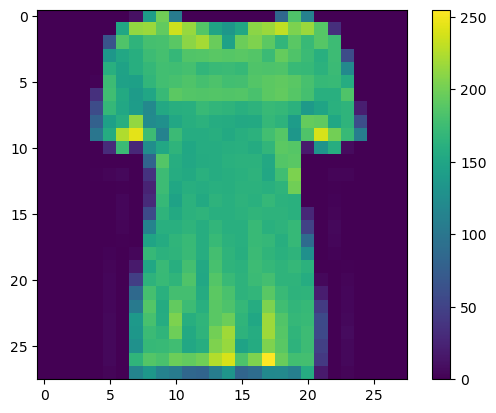

In [4]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

### Data Preprocessing

希望將每筆輸入都介於0和1之間，因權重會隨機介於0和1之間，值太大會使分類更加困難

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

### Building the Model



In [6]:
model = keras.Sequential([
    # Flatten：將多維延展至一維
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer
    # Dense：前一層的所有node都會連接這一層的每個node
    keras.layers.Dense(128, activation='relu'),  # hidden layer
    keras.layers.Dense(10, activation='softmax') # output layer
])

### Compile the Model

In [7]:
model.compile(optimizer='adam', # adam，梯度下降的延伸
       loss='sparse_categorical_crossentropy', # 損失函數選擇
       metrics=['accuracy'])# 我們要的東西

### Training

In [8]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4970 - accuracy: 0.8271
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3721 - accuracy: 0.8660
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3362 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3107 - accuracy: 0.8866
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2935 - accuracy: 0.8913


### Evaluating

In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) # verbose，cosole會顯示不一樣的東西，有0~2，默認1

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3485 - accuracy: 0.8745
Test accuracy: 0.8744999766349792


### Predictions

[3.9111892e-05 7.1695666e-07 8.3796561e-02 3.9365190e-07 8.9763814e-01
 1.6489263e-07 1.8509559e-02 3.6105099e-09 1.5241135e-05 2.0204318e-09]
Coat


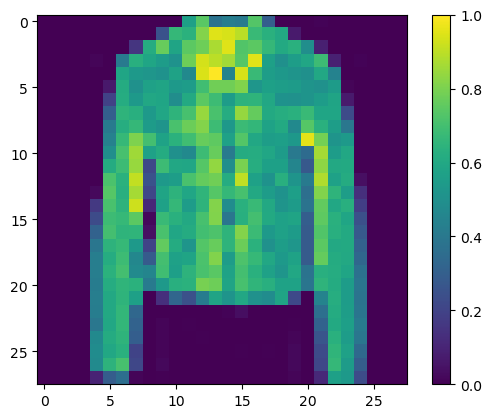

In [10]:
predictions = model.predict(test_images)


print(predictions[10]) # 輸出層結果

print(class_names[np.argmax(predictions[10])]) # 返回Max Value

plt.figure()
plt.imshow(test_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
import os


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

model = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, 3, padding="valid", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10),
    ]
)


def my_model():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Conv2D(32, 3)(inputs)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3)(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(128, 3)(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(10)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


model = my_model()
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=3e-4),
    metrics=["accuracy"],
)

model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=2)
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

RuntimeError: Physical devices cannot be modified after being initialized